# **Car price prediction using MLP regression with Tensorflow**





In [1]:
!pip install opendatasets

In [9]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = "https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ckanwarit
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge


100%|██████████| 429k/429k [00:00<00:00, 68.7MB/s]

In [5]:
df = pd.read_csv('/content/car-price-prediction-challenge/car_price_prediction.csv')
df.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1205,45765147,314,475,FIAT,500,2012,Sedan,Yes,Petrol,1.4,240350 km,4.0,Automatic,Front,04-May,Left wheel,White,12
12834,45802469,6743,1099,HYUNDAI,Grandeur,2010,Sedan,Yes,LPG,2.7,66000 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
4592,45801533,15612,583,HYUNDAI,Elantra,2011,Sedan,Yes,Petrol,1.6,120000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
3346,45808872,13297,531,CHEVROLET,Aveo,2012,Hatchback,Yes,Petrol,1.6,46000 km,4.0,Automatic,Front,04-May,Left wheel,Red,4
9130,45730872,43868,730,SSANGYONG,Actyon,2016,Jeep,Yes,Petrol,1.6,70940 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [8]:
df.shape

(19237, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## 1. EDA

### What is the average price of each car manufacturer?

In [27]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()
mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']
mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

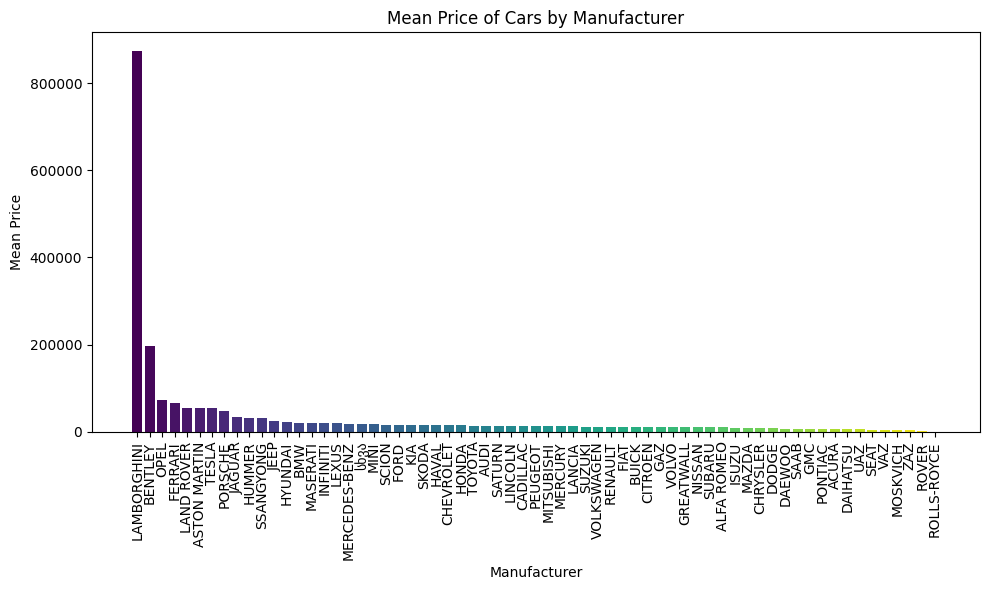

In [26]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price'].mean().reset_index()

mean_price_per_manufacturer.columns = ['Manufacturer', 'Mean_Price']

mean_price_per_manufacturer = mean_price_per_manufacturer.sort_values(by='Mean_Price', ascending=False)

plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, mean_price_per_manufacturer.shape[0]))
plt.bar(mean_price_per_manufacturer['Manufacturer'], mean_price_per_manufacturer['Mean_Price'], color=colors)
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price of Cars by Manufacturer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*   As the figure shows, the significantly highest car pricein our data set is the Lamborghini.
*   which costs approximately 870000 usd or 31,633,200 Bath


